In [65]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import warnings
warnings.filterwarnings('ignore')

In [98]:
#loading the dataset
df=pd.read_csv("/content/Churn_Modelling.csv")

In [99]:
#glance of dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [100]:
df.shape

(10000, 14)

In [101]:
#Basic description of the data
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# To see if there are any null values or missing value 
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#Unique values in each rows
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [102]:
#dropping unnecessary columns
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#Data Analysis and Visualization

In [14]:
fig = px.histogram(df, x="Gender", y="IsActiveMember",
             color='Gender', barmode='group',
             width=500, height=500)
fig.show()

The above graph is a comparison between gender(Male & Female) who are still active customers
at the bank.

In [15]:
fig = px.pie(df, values='Exited',names='Gender',width=800, height=500)
fig.show()

We see 44.1% of male customers from the male category and 55.9% of female customers from
the female category have left/exited from the bank.

In [20]:
plt.figure(figsize=(10,7))
fig = px.histogram(df, x="Age")
fig.show()

<Figure size 1000x700 with 0 Axes>

Most of the customers are from age 25 to 45. The youngest customer is of age 18 and the eldest
customer is of age 92.

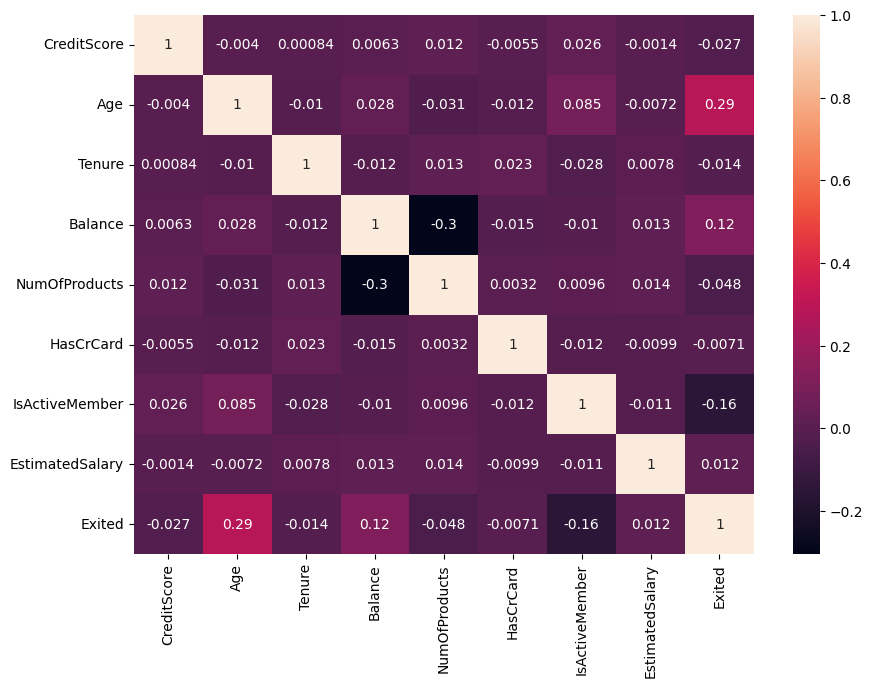

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

We have used a heat map to depict the correlation between predictors and the response variable
for the churn dataset. Considering "Exited" as Target variable and comparing how other variables
are related to it. It can be observed that IsActiveMember, “NumOfProducts” are negatively
highly related. On the other side, Age is highly positively correlated to the column “Exited”

<Axes: xlabel='IsActiveMember', ylabel='count'>

<Figure size 1000x700 with 0 Axes>

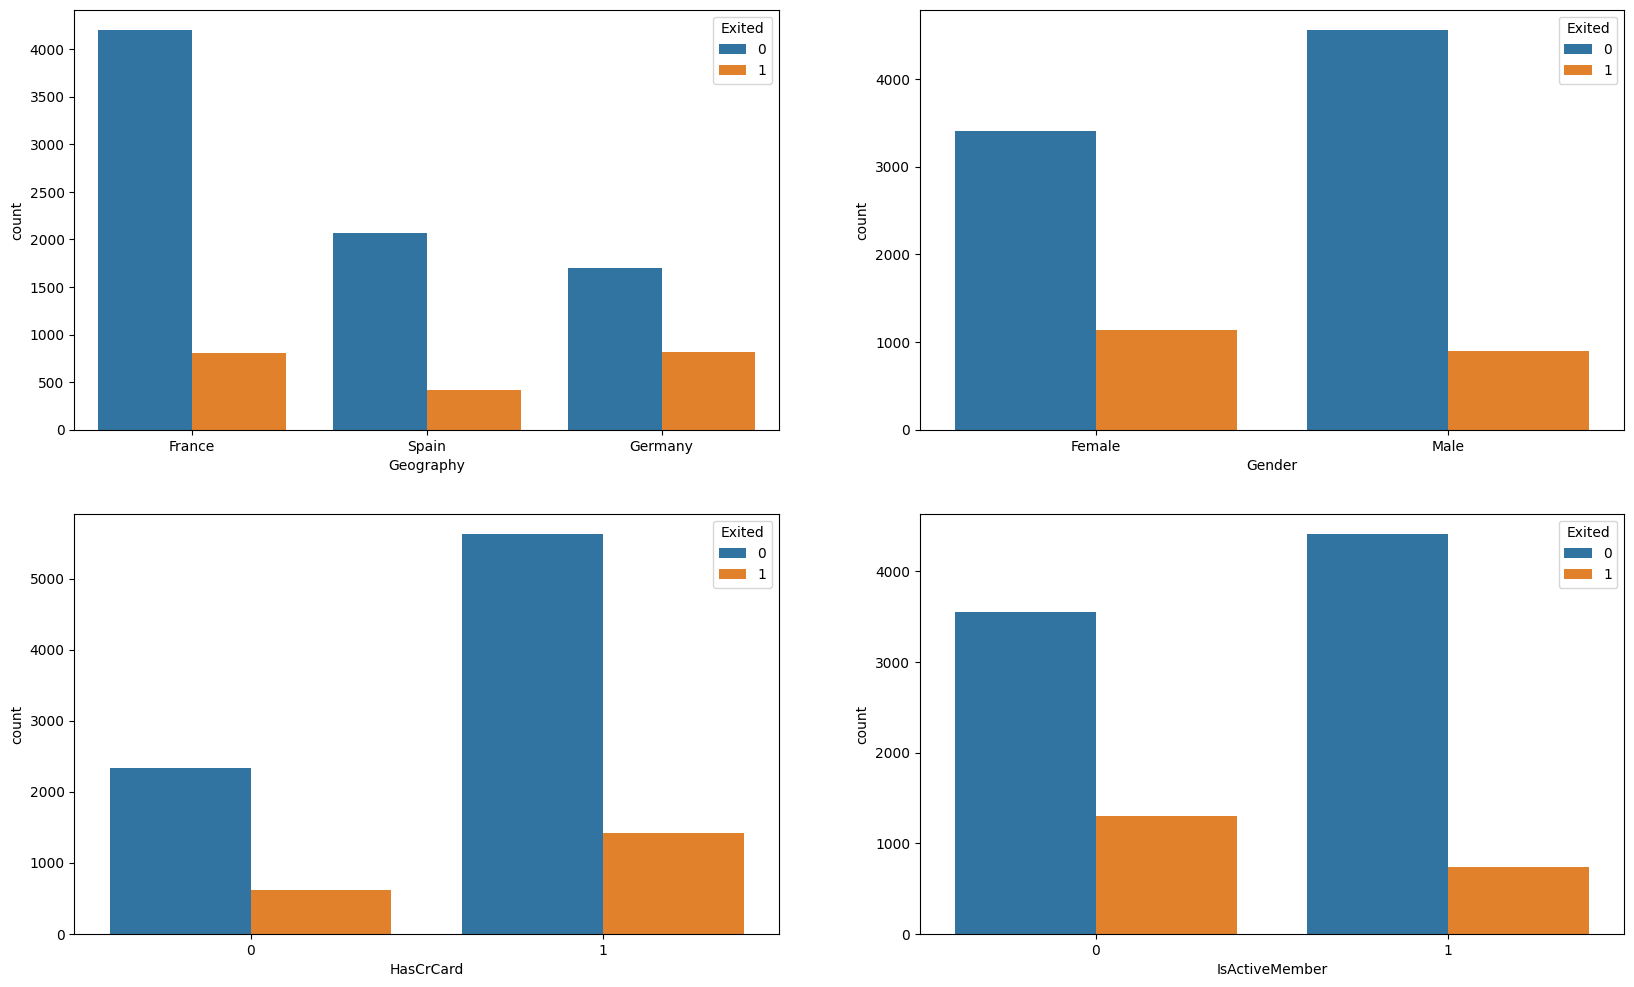

In [21]:
    # We first review the 'Status' relation with categorical variables
    plt.figure(figsize=(10,7))
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

*  Majority of the data is from persons from France. However, the proportion of churned customers is inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
*  The proportion of female customers churning is also greater than that of male customers
*  Interestingly, the majority of the customers that churned are those with credit cards. Given that the majority of the customers have credit cards could prove this to be just a
coincidence.
* Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive members is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definitely have a positive impact on the customer churn.

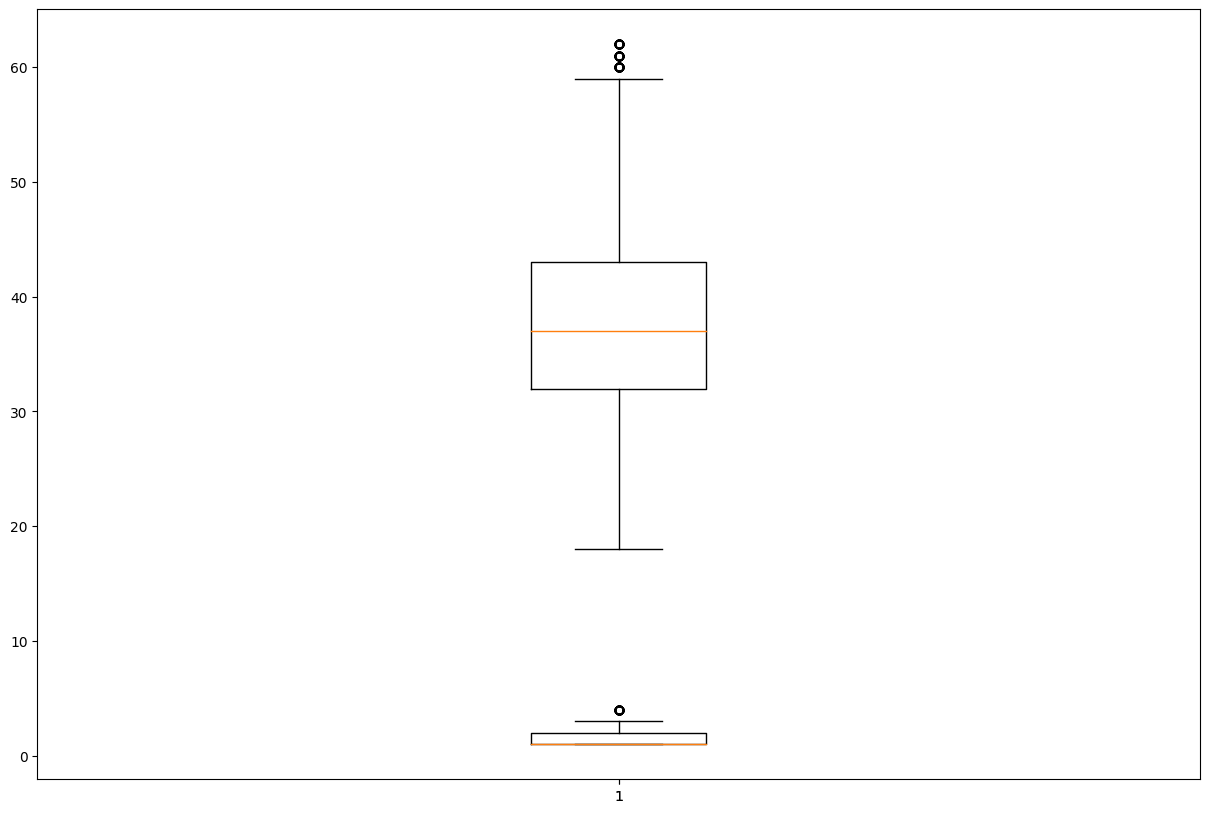

In [109]:
plt.figure(figsize=(15,10))
df_subset=df[["NumOfProducts","Age","Tenure"]]
#plt.boxplot(df[["NumOfProducts","Age","Tenure"]], index=["NumOfProducts","Age","Tenure"])
plt.boxplot(df_subset["NumOfProducts"])
plt.boxplot(df_subset["Age"]) 


#plt.subplots_adjust(left=0.25)
plt.show()

It can be ssen that Age has many numbers of outliers as compared to NumOfProducts



In [103]:
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
print(f'IQR : {iqr}')

IQR : 12.0


In [105]:
up = df['Age'].quantile(0.75) + 1.5 * iqr
down = df['Age'].quantile(0.25) - 1.5 * iqr

print(f'Upper Limit : {up}\nLower Limit : {down}')


Upper Limit : 62.0
Lower Limit : 14.0


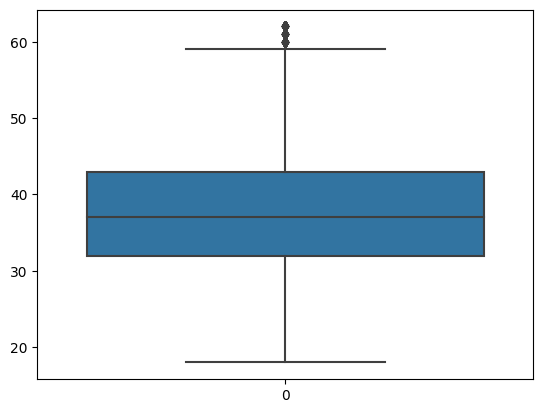

In [106]:
age = df['Age']
outliers = []

for i in age:
    if i>up:
        outliers.append(i)
        
for i in age:
    if i<down:
        outliers.append(i)

df['Age'] = df['Age'].replace(outliers,df['Age'].mean())

plt.figure()
sns.boxplot(df['Age'])
plt.show()

As it can be seen that most of the outliers are removed and replaced with the meanof the data. So, data is ready to train.

In [107]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [108]:
df.shape

(10000, 11)

#Model Building

In [89]:
#one hot representation and noramlization of data
from sklearn.preprocessing import MinMaxScaler
one_hot_encoded_data = pd.get_dummies(df, columns = ['Geography', 'Gender'])
#renamed the datacolumns so it is easy to read
one_hot_encoded_data.rename(columns={'Gender_Female':'Female',
                    'Gender_Male':'Male',
                     'Geography_France': 'France',
                     'Geography_Germany' : 'Germany',
                     'Geography_Spain':'Spain'}, inplace = True)
#MinMaxScaler is used for normalization 
scalar=MinMaxScaler()
data_prepared=scalar.fit_transform(one_hot_encoded_data.iloc[:,1:8], y=None)
data_prepared=pd.DataFrame(data_prepared)
data_prepared = pd.concat([data_prepared, one_hot_encoded_data.iloc[:,7::]], axis=1, join='inner')
data_prepared.columns=one_hot_encoded_data.columns.values
data_prepared.head

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,101348.88,1,1,0,0,1,0
1,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,112542.58,0,0,0,1,1,0
2,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,113931.57,1,1,0,0,1,0
3,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,93826.63,0,1,0,0,1,0
4,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,79084.10,0,0,0,1,1,0


In [90]:
data_prepared.shape


(10000, 14)

In [81]:
#spliting the dataset before normalization
#splitted in 75% training and 25% test dataset
from sklearn.model_selection import train_test_split
predictor_raw = one_hot_encoded_data.drop(['Exited'], axis = 1)
response_var_raw = one_hot_encoded_data['Exited']
X_train_raw, X_test_raw,y_train_raw, y_test_raw = train_test_split(predictor_raw,response_var_raw ,random_state=104,test_size=0.25, shuffle=True)
X_train_raw.shape


(7500, 13)

In [82]:
#logistic regression before normalizing the data
from sklearn.linear_model import LogisticRegression 

lg = LogisticRegression(solver='liblinear')
lg_fit = lg.fit(X_train_raw, y_train_raw)
lg_pred_train= lg_fit.predict(X_train_raw)
lg_pred_test= lg_fit.predict(X_test_raw)



In [91]:
#accuracy, F1 score, ROC score of logistic regression before normalization of data

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,accuracy_score


print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(lg_pred_test, y_test_raw)))
print('Accuracy Score for training set :' +'{}'.format(accuracy_score(lg_pred_train, y_train_raw)))

print('\nF1 score for testing set :'+'{}'.format(f1_score(lg_pred_test, y_test_raw)))
print('F1 score for training set:'+'{}'.format(f1_score(lg_pred_train, y_train_raw)))


print('\nROC AUC Score for testing set: ' +'{}'.format(roc_auc_score(y_test_raw, lg_fit.predict_proba(X_test_raw)[::,1])))
print('ROC AUC Score for train set: ' +'{}'.format(roc_auc_score(y_train_raw, lg_fit.predict_proba(X_train_raw)[::,1])))
confusion_matrix(y_test_raw,lg_pred_test)

Accuracy Score for testing set :0.7972
Accuracy Score for training set :0.7904

F1 score for testing set :0.10265486725663718
F1 score for training set:0.08710801393728224

ROC AUC Score for testing set: 0.6836351310754831
ROC AUC Score for train set: 0.6717410803623662


array([[1964,   28],
       [ 479,   29]])

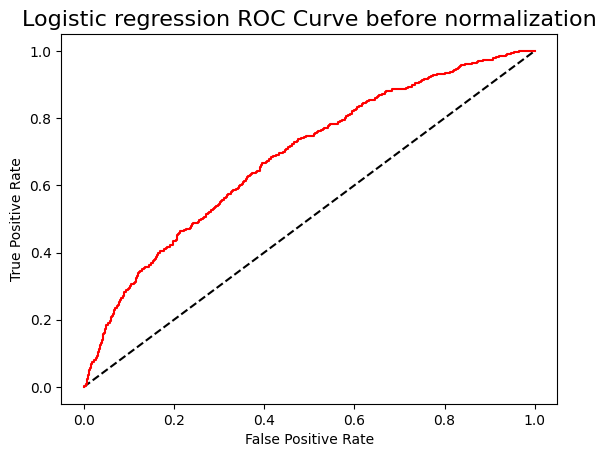

In [92]:
#logistic regression curve before normalization of data
y_probab_lg=lg.predict_proba(X_test_raw)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test_raw, y_probab_lg)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Logistic Regression', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic regression ROC Curve before normalization',fontsize=16)
plt.show()

In [ ]:
#spliting the dataset after normalization

predictor = data_prepared.drop(['Exited'], axis = 1)
response_var = data_prepared['Exited']
X_train, X_test,y_train, y_test = train_test_split(predictor,response_var ,random_state=104,test_size=0.25, shuffle=True)
X_train.shape

In [57]:
#logistic regression after normalization of data


clf = LogisticRegression(solver='liblinear')
fit=clf.fit(X_train, y_train)
fit_predict_train=fit.predict(X_train)#on trainig data 
fit_predict_test=fit.predict(X_test)#on testing data



In [87]:
#accuracy, F1 score, ROC Score of logistic regression after normalization
print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(fit_predict_test, y_test)))
print('Accuracy Score for training set :' +'{}'.format(accuracy_score(fit_predict_train, y_train)))

print('\nF1 score for testing set :'+'{}'.format(f1_score(fit_predict_test, y_test)))
print('F1 score for training set:'+'{}'.format(f1_score(fit_predict_train, y_train)))


print('\nROC AUC Score for testing set: ' +'{}'.format(roc_auc_score(y_test, fit.predict_proba(X_test)[::,1])))
print('ROC AUC Score for train set: ' +'{}'.format(roc_auc_score(y_train, fit.predict_proba(X_train)[::,1])))
confusion_matrix(y_test,fit_predict_test)


Accuracy Score for testing set :0.7968
Accuracy Score for training set :0.7961333333333334

F1 score for testing set :0.0
F1 score for training set:0.0

ROC AUC Score for testing set: 0.5143941909369762
ROC AUC Score for train set: 0.4836783060572142


array([[1992,    0],
       [ 508,    0]])

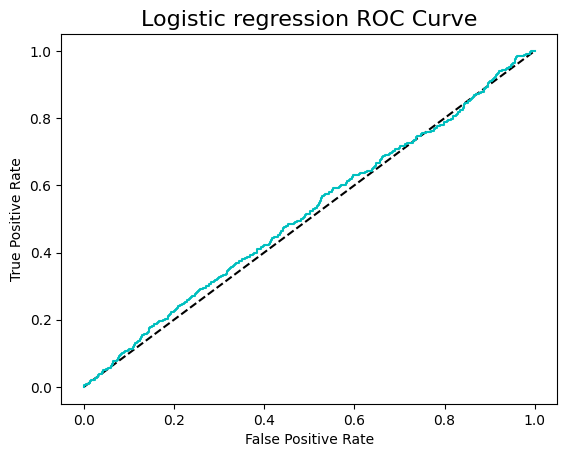

In [86]:
#ROC curve after normalization on data
y_probab=clf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_probab)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Logistic Regression', color='c')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic regression ROC Curve',fontsize=16)
plt.show()

In [67]:
#decision tree
from sklearn import tree
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predicttraindt_y = dt_model.predict(X_train)#fitting model on x_train
predictdt_y = dt_model.predict(X_test)#fitting model on x_test
accuracy_dt = dt_model.score(X_test,y_test)


In [63]:
#accuracy, F1 score, ROC Score of decision tree after normalization
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,accuracy_score

print("Decision Tree accuracy is :",accuracy_dt)

print('\nF1 score for testing set :'+'{}'.format(f1_score(predictdt_y, y_test)))
print('F1 score for training set:'+'{}'.format(f1_score(predicttraindt_y, y_train)))


print('\nROC AUC Score for testing set: ' +'{}'.format(roc_auc_score(y_test, fit.predict_proba(X_test)[::,1])))
print('ROC AUC Score for train set: ' +'{}'.format(roc_auc_score(y_train, fit.predict_proba(X_train)[::,1])))

confusion_matrix(y_test, predictdt_y)

Decision Tree accuracy is : 0.7836

F1 score for testing set :0.49201877934272303
F1 score for training set:1.0

ROC AUC Score for testing set: 0.5143941909369762
ROC AUC Score for train set: 0.4836783060572142


array([[1697,  295],
       [ 246,  262]])

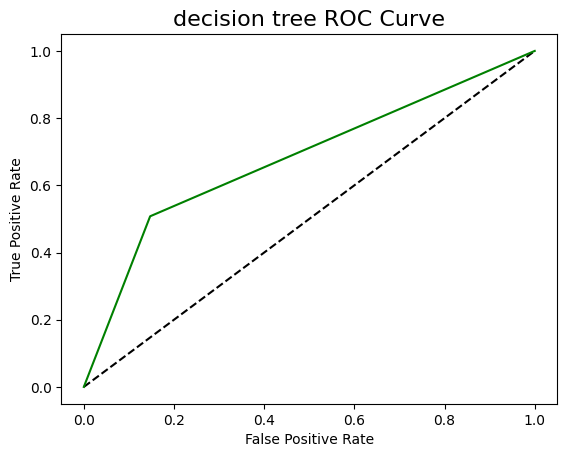

In [68]:
#curve for decision tree
y_probab_dt=dt_model.predict_proba(X_test)[:,1]
fpr_rf_dt, tpr_rf_dt, thresholds = roc_curve(y_test, y_probab_dt)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_rf_dt, tpr_rf_dt, label='decision tree', color='g')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('decision tree ROC Curve',fontsize=16)
plt.show()

In [69]:
#knn
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knn_model=neigh.fit(X_test, y_test)
predict_train_knn=neigh.predict(X_train)
predict_y_knn=neigh.predict(X_test)
predict_y_knn

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
#accuracy, F1 score, ROC Score of knn after normalization

import warnings
warnings.filterwarnings('ignore')

print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(fit_predict_test, y_test)))
print('Accuracy Score for training set :' +'{}'.format(accuracy_score(fit_predict_train, y_train)))


print('\nF1 score for testing set :'+'{}'.format(f1_score(predict_y_knn, y_test)))
print('F1 score for training set:'+'{}'.format(f1_score(predict_train_knn, y_train)))


print('\nROC AUC Score for testing set: ' +'{}'.format(roc_auc_score(predict_y_knn, neigh.predict_proba(X_test)[::,1])))
print('ROC AUC Score for train set: ' +'{}'.format(roc_auc_score(predict_train_knn, neigh.predict_proba(X_train)[::,1])))

confusion_matrix(y_test, predict_y_knn)

Accuracy Score for testing set :0.7968
Accuracy Score for training set :0.7961333333333334

F1 score for testing set :0.5074257425742575
F1 score for training set:0.14124529878813205

ROC AUC Score for testing set: 1.0
ROC AUC Score for train set: 1.0


array([[1897,   95],
       [ 303,  205]])

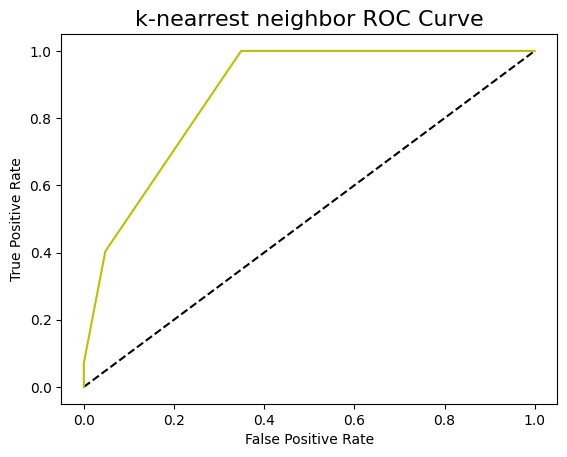

In [71]:
#curve for knn
import warnings
warnings.filterwarnings('ignore')
y_probab_knn=neigh.predict_proba(X_test)[:,1]
fpr_rf_knn, tpr_rf_knn, thresholds = roc_curve(y_test, y_probab_knn)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_rf_knn, tpr_rf_knn, label='knn', color='y')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('k-nearrest neighbor ROC Curve',fontsize=16)
plt.show()

In [74]:
#random forest
import sklearn
from sklearn.ensemble import RandomForestClassifier
randomclass = RandomForestClassifier(max_depth=2, random_state=0)
rc=randomclass.fit(X_train, y_train)
ypred_train_rc=rc.predict(X_train)
ypred_test_rc=rc.predict(X_test)
ypred_test_rc

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
#accuracy, F1 score, ROC Score of Random Forest after normalization
import warnings
warnings.filterwarnings('ignore')

print('Accuracy Score for testing set :' +'{}'.format(accuracy_score(ypred_test_rc, y_test)))
print('Accuracy Score for training set :' +'{}'.format(accuracy_score(ypred_train_rc, y_train)))


print('\nF1 score for testing set :'+'{}'.format(f1_score(ypred_test_rc, y_test)))
print('F1 score for training set:'+'{}'.format(f1_score(ypred_train_rc, y_train)))


print('\nROC AUC Score for testing set: ' +'{}'.format(roc_auc_score(predict_y_knn, rc.predict_proba(X_test)[::,1])))
print('ROC AUC Score for train set: ' +'{}'.format(roc_auc_score(predict_train_knn, rc.predict_proba(X_train)[::,1])))

confusion_matrix(y_test, ypred_test_rc)

Accuracy Score for testing set :0.8076
Accuracy Score for training set :0.8073333333333333

F1 score for testing set :0.10093457943925235
F1 score for training set:0.10415375077495351

ROC AUC Score for testing set: 0.6660666666666666
ROC AUC Score for train set: 0.5079421763724242


array([[1992,    0],
       [ 481,   27]])

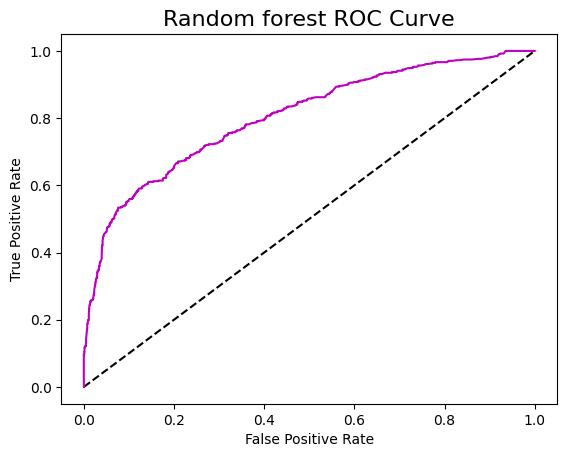

In [80]:
#curve for Random forest
import warnings
warnings.filterwarnings('ignore')
y_probab_rc=rc.predict_proba(X_test)[:,1]
fpr_rf_rc, tpr_rf_rc, thresholds = roc_curve(y_test, y_probab_rc)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_rf_rc, tpr_rf_rc, label='rc', color='m')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest ROC Curve',fontsize=16)
plt.show()